<a href="https://colab.research.google.com/github/IrakizaGaius/PeerGroup8WaterQualityModel/blob/main/Peer_Group_8__formative_II__Gaius_Irakiza.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Excercise - Creating our own custom Model

This is a notebook that provides a quick overview of how to create your own custom model. You will be creating a simple model.
You will be utilizing Keras and Tensorflow


## Water Quality Dataset

This dataset contains water quality measurements and assessments related to potability, which is the suitability of water for human consumption. The dataset's primary objective is to provide insights into water quality parameters and assist in determining whether the water is potable or not. Each row in the dataset represents a water sample with specific attributes, and the "Potability" column indicates whether the water is suitable for consumption.

https://www.kaggle.com/datasets/uom190346a/water-quality-and-potability?select=water_potability.csv


In [171]:
# Import Necessary dependencies
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, precision_score, recall_score, roc_auc_score, f1_score




# Data Loading

In [172]:
data = pd.read_csv("/content/water_potability.csv")
data.head(10)

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
5,5.584087,188.313324,28748.687739,7.544869,326.678363,280.467916,8.399735,54.917862,2.559708,0
6,10.223862,248.071735,28749.716544,7.513408,393.663396,283.651634,13.789695,84.603556,2.672989,0
7,8.635849,203.361523,13672.091764,4.563009,303.309771,474.607645,12.363817,62.798309,4.401425,0
8,NaN,118.988579,14285.583854,7.804174,268.646941,389.375566,12.706049,53.928846,3.595017,0
9,11.180284,227.231469,25484.508491,9.077200,404.041635,563.885481,17.927806,71.976601,4.370562,0


In [173]:
# Information on the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [174]:
# Brief overview of the dataset statistics
data.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,2785.000000,3276.000000,3276.000000,3276.000000,2495.000000,3276.000000,3276.000000,3114.000000,3276.000000,3276.000000
mean,7.080795,196.369496,22014.092526,7.122277,333.775777,426.205111,14.284970,66.396293,3.966786,0.390110
std,1.594320,32.879761,8768.570828,1.583085,41.416840,80.824064,3.308162,16.175008,0.780382,0.487849
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.093092,176.850538,15666.690297,6.127421,307.699498,365.734414,12.065801,55.844536,3.439711,0.000000
50%,7.036752,196.967627,20927.833607,7.130299,333.073546,421.884968,14.218338,66.622485,3.955028,0.000000
75%,8.062066,216.667456,27332.762127,8.114887,359.950170,481.792304,16.557652,77.337473,4.500320,1.000000
max,14.000000,323.124000,61227.196008,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


In [175]:
# drop duplicates rows of data

data = data.drop_duplicates()

In [176]:
# percentage of missingness in the data for each column

missing = data.isnull().mean()*100
print(missing)

ph                 14.987790
Hardness            0.000000
Solids              0.000000
Chloramines         0.000000
Sulfate            23.840049
Conductivity        0.000000
Organic_carbon      0.000000
Trihalomethanes     4.945055
Turbidity           0.000000
Potability          0.000000
dtype: float64


In [177]:
# MICE IMPUTATION to fill the missing data
# create the imputer using MICE

# separate the target variable from the rest of the data to make sure it is not changed or imputed
features = data.drop(columns='Potability')
target = data.Potability
imputer = IterativeImputer(random_state=0)
features_imputed = imputer.fit_transform(features)

# convert the data back into a dataframe
features_imputed = pd.DataFrame(features_imputed, columns=features.columns)

# merge target variable and data
data_imputed = pd.concat([features_imputed, target], axis=1)
data_imputed.head(10)


,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,7.190863,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,344.836463,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,331.981769,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
5,5.584087,188.313324,28748.687739,7.544869,326.678363,280.467916,8.399735,54.917862,2.559708,0
6,10.223862,248.071735,28749.716544,7.513408,393.663396,283.651634,13.789695,84.603556,2.672989,0
7,8.635849,203.361523,13672.091764,4.563009,303.309771,474.607645,12.363817,62.798309,4.401425,0
8,6.927779,118.988579,14285.583854,7.804174,268.646941,389.375566,12.706049,53.928846,3.595017,0
9,11.180284,227.231469,25484.508491,9.077200,404.041635,563.885481,17.927806,71.976601,4.370562,0


In [183]:
# confirm imputed data
data_imputed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               3276 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          3276 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3276 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [184]:
def clip_outliers_iqr(df, column_name):
    Q1 = df[column_name].quantile(0.25)
    Q3 = df[column_name].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # count and show outliers
    outliers = df[(df[column_name] < lower_bound) | (df[column_name] > upper_bound)]
    print(f"Column: {column_name}")
    print(f"Number of outliers: {len(outliers)}")
    print(f"Percentage of outliers: {len(outliers)/len(df)*100:.2f}%")

    # clip the values instead of removing them
    df[column_name] = df[column_name].clip(lower=lower_bound, upper=upper_bound)

    return df

columns = ['Hardness', 'Solids', 'Sulfate', 'Conductivity', 'Organic_carbon', 'Trihalomethanes', 'Turbidity']
data_imputed_copy = data_imputed.copy()

for col in columns:
    data_imputed_copy = clip_outliers_iqr(data_imputed_copy, col)

Column: Hardness
Number of outliers: 83
Percentage of outliers: 2.53%
Column: Solids
Number of outliers: 47
Percentage of outliers: 1.43%
Column: Sulfate
Number of outliers: 247
Percentage of outliers: 7.54%
Column: Conductivity
Number of outliers: 11
Percentage of outliers: 0.34%
Column: Organic_carbon
Number of outliers: 25
Percentage of outliers: 0.76%
Column: Trihalomethanes
Number of outliers: 54
Percentage of outliers: 1.65%
Column: Turbidity
Number of outliers: 19
Percentage of outliers: 0.58%


Plot the Data Appropriately

In [185]:
# Transforms data to have mean=0 and standard deviation=1

scaler = StandardScaler()

X = data_imputed_copy.drop(columns='Potability', axis=1)
y= data_imputed_copy['Potability']

X_scaled = scaler.fit_transform(X)


X_scaled.shape


(3276, 9)

In [186]:

# Split the data into training validation and test sets
X_train, X_temp, y_train, y_temp = train_test_split(X_scaled, y, test_size=0.3,random_state=42,
    stratify=y               # Keep same class distribution in all splits
)

X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5,stratify=y_temp)

print(f"\n=== FINAL SHAPES ===")
print(f"X_train: {X_train.shape}")
print(f"X_val: {X_val.shape}")
print(f"X_test: {X_test.shape}")
print(f"y_train: {y_train.shape}")
print(f"y_val: {y_val.shape}")
print(f"y_test: {y_test.shape}")




=== FINAL SHAPES ===
X_train: (2293, 9)
X_val: (491, 9)
X_test: (492, 9)
y_train: (2293,)
y_val: (491,)
y_test: (492,)


# Each Member Defines their model Here

In [188]:
def model_gaius_irakiza(input_shape):

  model = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=input_shape),

    tf.keras.layers.Dense(128, kernel_regularizer=tf.keras.regularizers.l2(0.001)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.PReLU(),
    tf.keras.layers.Dropout(0.2),

    tf.keras.layers.Dense(64, kernel_regularizer=tf.keras.regularizers.l2(0.001)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.PReLU(),
    tf.keras.layers.Dropout(0.2),

    tf.keras.layers.Dense(32, kernel_regularizer=tf.keras.regularizers.l2(0.006)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.PReLU(),
    tf.keras.layers.Dropout(0.2),

    tf.keras.layers.Dense(24, kernel_regularizer=tf.keras.regularizers.l2(0.006)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.PReLU(),
    tf.keras.layers.Dropout(0.2),

    tf.keras.layers.Dense(16, kernel_regularizer=tf.keras.regularizers.l2(0.006)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.PReLU(),
    tf.keras.layers.Dropout(0.2),

    tf.keras.layers.Dense(8, kernel_regularizer= tf.keras.regularizers.l2(0.006)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.PReLU(),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(4),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.PReLU(),


    tf.keras.layers.Dense(1, activation='sigmoid')
    ])

  optimizer = tf.keras.optimizers.Nadam(
    learning_rate=0.006,
)

  model.compile(
        optimizer=optimizer,
        loss='binary_crossentropy',
        metrics=[
            'accuracy',
            tf.keras.metrics.Precision(name='precision'),
            tf.keras.metrics.Recall(name='recall'),
            tf.keras.metrics.AUC(name='auc')
        ]
    )

  return model

input_shape = X_train.shape[1:]

gaius_model = model_gaius_irakiza(input_shape)

early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=30,
    min_delta=0.0001,
    restore_best_weights=True
)

# Training
history = gaius_model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=300,
    batch_size=42,
    verbose=1,
    callbacks=[early_stopping]
)

Epoch 1/300
55/55 ━━━━━━━━━━━━━━━━━━━━ 14s 27ms/step - accuracy: 0.5807 - auc: 0.4979 - loss: 1.3202 - precision: 0.3436 - recall: 0.1017 - val_accuracy: 0.5825 - val_auc: 0.5337 - val_loss: 1.1117 - val_precision: 0.2667 - val_recall: 0.0419
Epoch 2/300
55/55 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - accuracy: 0.6138 - auc: 0.5035 - loss: 1.0412 - precision: 0.4694 - recall: 0.1119 - val_accuracy: 0.6130 - val_auc: 0.5542 - val_loss: 0.9001 - val_precision: 1.0000 - val_recall: 0.0052
Epoch 3/300
55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.6199 - auc: 0.5652 - loss: 0.8656 - precision: 0.5450 - recall: 0.1499 - val_accuracy: 0.6110 - val_auc: 0.5809 - val_loss: 0.8076 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 4/300
55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.6403 - auc: 0.6148 - loss: 0.7748 - precision: 0.6396 - recall: 0.2231 - val_accuracy: 0.6212 - val_auc: 0.5902 - val_loss: 0.7556 - val_precision: 1.0000 - val_recall: 0.0262
Epoch 5/300
55/55 ━━━━━━━

# Model Evaluation

📌 Best Epoch: 19
Train Accuracy at Best Epoch: 0.6672
Val Accuracy at Best Epoch  : 0.6741
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6553 - auc: 0.6609 - loss: 0.6715 - precision: 0.6180 - recall: 0.4551 

📊 Test Evaluation Metrics
Loss      : 0.6599
Accuracy  : 0.6687
Precision : 0.5986
Recall    : 0.4583
AUC       : 0.6707
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step

🧠 Additional Classification Metrics
F1 Score  : 0.5192
AUC (sklearn): 0.6713


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 129514 (\N{TEST TUBE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


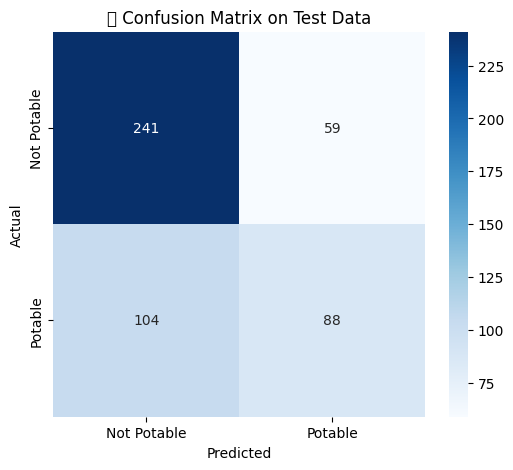

In [189]:
# Best epoch based on validation loss
best_epoch = np.argmin(history.history['val_loss'])
print(f"📌 Best Epoch: {best_epoch + 1}")
print(f"Train Accuracy at Best Epoch: {history.history['accuracy'][best_epoch]:.4f}")
print(f"Val Accuracy at Best Epoch  : {history.history['val_accuracy'][best_epoch]:.4f}")

# Evaluate on test set
test_loss, test_accuracy, test_precision, test_recall, test_auc = gaius_model.evaluate(X_test, y_test, verbose=1)

print("\n📊 Test Evaluation Metrics")
print(f"Loss      : {test_loss:.4f}")
print(f"Accuracy  : {test_accuracy:.4f}")
print(f"Precision : {test_precision:.4f}")
print(f"Recall    : {test_recall:.4f}")
print(f"AUC       : {test_auc:.4f}")

# Predictions (binary classification threshold at 0.5)
y_pred_probs = gaius_model.predict(X_test)
y_pred_classes = (y_pred_probs > 0.5).astype("int32")

# Precision, Recall, F1
precision = precision_score(y_test, y_pred_classes)
recall = recall_score(y_test, y_pred_classes)
f1 = f1_score(y_test, y_pred_classes)
auc = roc_auc_score(y_test, y_pred_probs)

print("\n🧠 Additional Classification Metrics")
print(f"F1 Score  : {f1:.4f}")
print(f"AUC (sklearn): {auc:.4f}")

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_classes)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Potable', 'Potable'], yticklabels=['Not Potable', 'Potable'])
plt.title("🧪 Confusion Matrix on Test Data")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()